In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/shee35/ML-Dataset/main/svm-dataset.csv')
dataset

,sno,Current
0,1,3
1,2,3
2,3,3
3,4,3
4,5,3
...,...,...
516,517,66771
517,518,66838
518,519,66853
519,520,66868


In [ ]:
X = dataset['sno'].values
y = dataset['Current'].values

## **NEW**

In [ ]:
from sklearn.preprocessing import StandardScaler

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') 
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

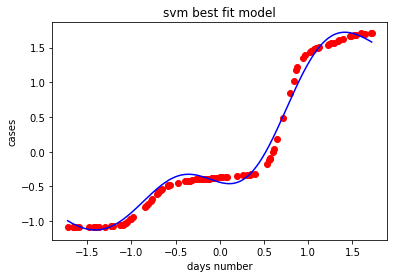

In [ ]:
X_grid = np.arange(min(X_test), max(X_test), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
vall =  regressor.predict(X_grid)

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, vall, color = 'blue')
plt.title('svm best fit model')
plt.xlabel('days number')
plt.ylabel('cases')
plt.show()

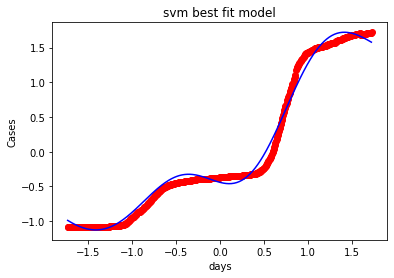

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
vall =  regressor.predict(X_grid)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, vall, color = 'blue')
plt.title('svm best fit model')
plt.xlabel('days')
plt.ylabel('Cases')
plt.show()

## **Errors**

# 1 Root mean square

In [ ]:
from math import sqrt

# Calculate root mean squared error
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)

# Test RMSE
rmse = rmse_metric(y_test, vall)
print(rmse)

1.3569245837268131


**MEAN ABSOLUTE ERROR**

In [ ]:
def mae_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		sum_error += abs(predicted[i] - actual[i])
	return sum_error / float(len(actual))
 


mae = mae_metric(y_test, vall)
print(mae)

[0.98148565]


**MEAN SQAURE ERROR**

In [ ]:
# # from sklearn.metrics import r2_score
# # r2_score(y_test, vall)
# from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, vall)
MSE= np.square(np.subtract(y_test,vall)).mean()
print(MSE)

1.9124109244947498
